In [ ]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt # dataviz
import seaborn as sns # dataviz
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
data = pd.read_csv('/content/immo_data.csv (1).zip')


In [ ]:
data.shape

(268850, 49)

In [ ]:
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [ ]:
data.tail()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
268845,Bayern,90.0,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.0,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.0,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.0,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.0,NO_INFORMATION,2019.0,NaN,NaN,May19
268849,Hessen,315.0,central_heating,NaN,NaN,False,True,9,5.00,NaN,...,Frankfurt_am_Main,Sossenheim,"Schöne, helle, gut geschnittene und teilmöblie...","Balkon, Keller, Fahrstuhl, Vollbad, Einbauküch...",NaN,NaN,NaN,NaN,NaN,Feb20


In [ ]:
data.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [ ]:
data.describe(include='object')

,regio1,heatingType,telekomTvOffer,firingTypes,geo_bln,houseNumber,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,typeOfFlat,regio2,regio3,description,facilities,energyEfficiencyClass,date
count,268850,223994,236231,211886,268850,197832,268850,200361,156185,154277,268850,197837,232236,268850,268850,249103,215926,77787,268850
unique,16,13,3,132,16,5510,419,10,4,3,52373,54490,10,419,8684,212621,189526,10,4
top,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,gas,Nordrhein_Westfalen,1,Leipzig,well_kept,normal,negotiable,no_information,Hauptstraße,apartment,Leipzig,Innenstadt,+ MEIN GUENTZ - Quartier der Generationen\r\n+...,Laminat,C,Feb20
freq,62863,128977,227632,110899,62863,7173,13723,66591,81826,91970,71013,911,131522,13723,4751,216,207,14613,79276


In [ ]:
#data.max()

In [ ]:
categorical_cols=data.columns[data.dtypes =='object']
print(categorical_cols)

Index(['regio1', 'heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln',
       'houseNumber', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'typeOfFlat', 'regio2', 'regio3',
       'description', 'facilities', 'energyEfficiencyClass', 'date'],
      dtype='object')


In [ ]:
numerical_cols=data.columns[data.dtypes !='object']
print(numerical_cols)

Index(['serviceCharge', 'telekomHybridUploadSpeed', 'newlyConst', 'balcony',
       'picturecount', 'pricetrend', 'telekomUploadSpeed', 'totalRent',
       'yearConstructed', 'scoutId', 'noParkSpaces', 'hasKitchen', 'cellar',
       'yearConstructedRange', 'baseRent', 'livingSpace', 'lift',
       'baseRentRange', 'geo_plz', 'noRooms', 'thermalChar', 'floor',
       'numberOfFloors', 'noRoomsRange', 'garden', 'livingSpaceRange',
       'heatingCosts', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')


In [ ]:
data.dtypes

regio1                       object
serviceCharge               float64
heatingType                  object
telekomTvOffer               object
telekomHybridUploadSpeed    float64
newlyConst                     bool
balcony                        bool
picturecount                  int64
pricetrend                  float64
telekomUploadSpeed          float64
totalRent                   float64
yearConstructed             float64
scoutId                       int64
noParkSpaces                float64
firingTypes                  object
hasKitchen                     bool
geo_bln                      object
cellar                         bool
yearConstructedRange        float64
baseRent                    float64
houseNumber                  object
livingSpace                 float64
geo_krs                      object
condition                    object
interiorQual                 object
petsAllowed                  object
street                       object
streetPlain                 

In [ ]:
data.nunique()

regio1                          16
serviceCharge                12266
heatingType                     13
telekomTvOffer                   3
telekomHybridUploadSpeed         1
newlyConst                       2
balcony                          2
picturecount                    95
pricetrend                    1234
telekomUploadSpeed               7
totalRent                    28486
yearConstructed                465
scoutId                     268850
noParkSpaces                    71
firingTypes                    132
hasKitchen                       2
geo_bln                         16
cellar                           2
yearConstructedRange             9
baseRent                     26659
houseNumber                   5510
livingSpace                  13005
geo_krs                        419
condition                       10
interiorQual                     4
petsAllowed                      3
street                       52373
streetPlain                  54490
lift                

In [ ]:
data.duplicated().sum()


0

In [ ]:
data.isnull().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percentage= data.isnull().sum()/data.isnull().count()*100
missing_data = pd.concat([total, percentage], axis=1, keys=['Total Missing Values', 'Percentage'])


In [ ]:
data=data.drop(['telekomHybridUploadSpeed','electricityKwhPrice','lastRefurbish','electricityBasePrice','energyEfficiencyClass','heatingCosts','noParkSpaces','petsAllowed','interiorQual','thermalChar','houseNumber','streetPlain','condition','firingTypes','facilities','heatingType','telekomTvOffer',
                'description','regio3','regio2','garden','geo_krs','cellar','geo_bln','scoutId','picturecount','date','telekomUploadSpeed'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                268850 non-null  object 
 1   serviceCharge         261941 non-null  float64
 2   newlyConst            268850 non-null  bool   
 3   balcony               268850 non-null  bool   
 4   pricetrend            267018 non-null  float64
 5   totalRent             228333 non-null  float64
 6   yearConstructed       211805 non-null  float64
 7   hasKitchen            268850 non-null  bool   
 8   yearConstructedRange  211805 non-null  float64
 9   baseRent              268850 non-null  float64
 10  livingSpace           268850 non-null  float64
 11  street                268850 non-null  object 
 12  lift                  268850 non-null  bool   
 13  baseRentRange         268850 non-null  int64  
 14  typeOfFlat            232236 non-null  object 
 15  

In [ ]:
data.isnull().sum()

regio1                      0
serviceCharge            6909
newlyConst                  0
balcony                     0
pricetrend               1832
totalRent               40517
yearConstructed         57045
hasKitchen                  0
yearConstructedRange    57045
baseRent                    0
livingSpace                 0
street                      0
lift                        0
baseRentRange               0
typeOfFlat              36614
geo_plz                     0
noRooms                     0
floor                   51309
numberOfFloors          97732
noRoomsRange                0
livingSpaceRange            0
dtype: int64

In [ ]:
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Replace missing values in categorical columns with mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


# Verify if there are still missing values
missing_values = data.isnull().sum()
missing_values

regio1                  0
serviceCharge           0
newlyConst              0
balcony                 0
pricetrend              0
totalRent               0
yearConstructed         0
hasKitchen              0
yearConstructedRange    0
baseRent                0
livingSpace             0
street                  0
lift                    0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
floor                   0
numberOfFloors          0
noRoomsRange            0
livingSpaceRange        0
dtype: int64

In [ ]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':\n{unique_values}\n")

Unique values in column 'regio1':
['Nordrhein_Westfalen' 'Rheinland_Pfalz' 'Sachsen' 'Bremen'
 'Schleswig_Holstein' 'Baden_Württemberg' 'Thüringen' 'Hessen'
 'Niedersachsen' 'Bayern' 'Hamburg' 'Sachsen_Anhalt'
 'Mecklenburg_Vorpommern' 'Berlin' 'Brandenburg' 'Saarland']

Unique values in column 'serviceCharge':
[245.   134.   255.   ... 189.65 250.94 112.13]

Unique values in column 'newlyConst':
[False  True]

Unique values in column 'balcony':
[False  True]

Unique values in column 'pricetrend':
[ 4.62  3.47  2.72 ... 10.3  -3.88 -0.45]

Unique values in column 'totalRent':
[ 840.          901.33152155 1300.         ...  436.55        828.77
 1479.64      ]

Unique values in column 'yearConstructed':
[1965.         1871.         2019.         1964.         1950.
 1999.         1966.40059017 1959.         1970.         1953.
 1930.         1892.         1912.         1951.         2018.
 1990.         1897.         1914.         2013.         1978.
 1890.         1902.         1977.  

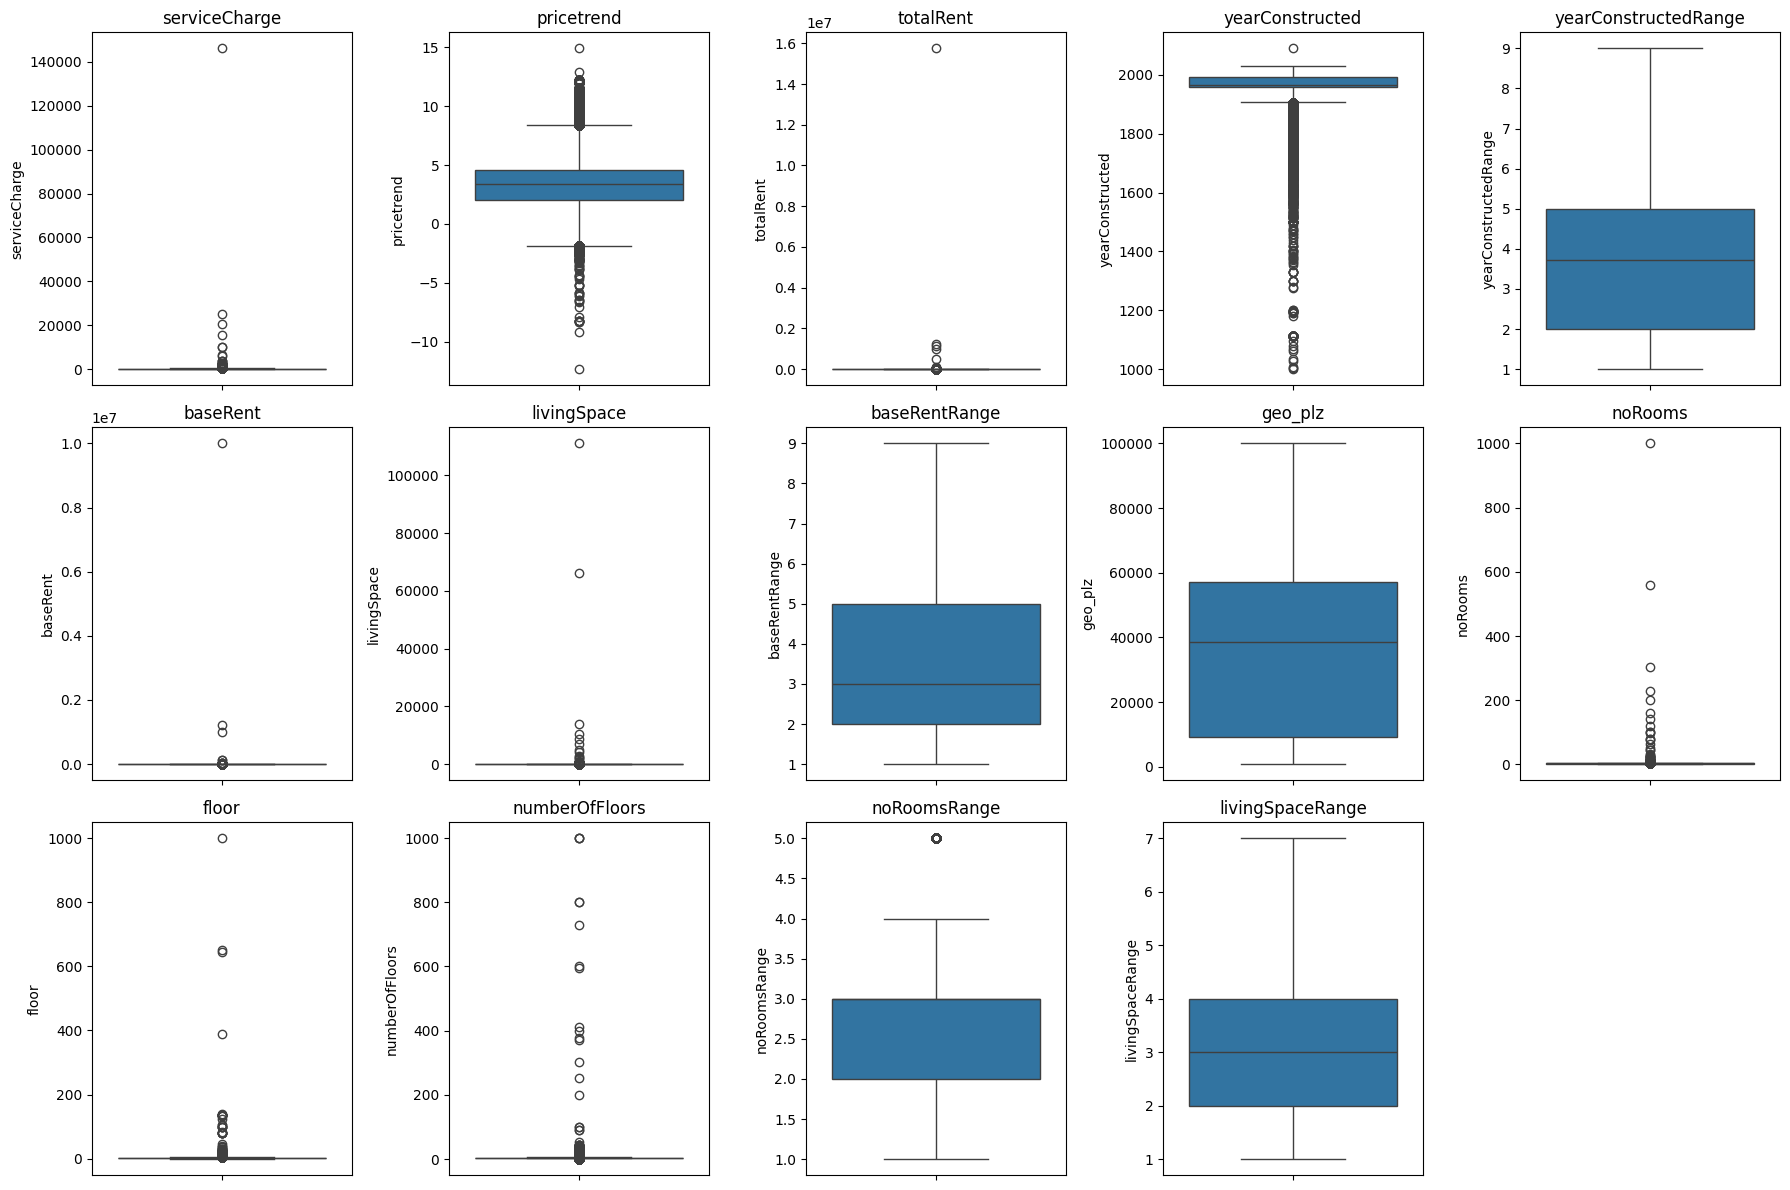

In [ ]:
# Assuming you have a DataFrame named 'data' with numerical columns
numerical_columns = data.select_dtypes(include='number')

plt.figure(figsize=(18, 12))

num_plots = len(numerical_columns.columns)  # Total number of plots
num_rows = (num_plots // 5) + 1  # Calculate the number of rows needed

for i, col in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, 5, i+1)  # Adjusting subplot position
    sns.boxplot(y=numerical_columns[col], showfliers=True)
    plt.title(col)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
def z_score_method(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    outliers = np.abs(z_scores) > threshold
    return outliers

In [ ]:
df = z_score_method(data[['serviceCharge', 'pricetrend', 'totalRent', 'yearConstructed', 'baseRent', 'livingSpace', 'noRooms', 'floor', 'numberOfFloors', 'noRoomsRange']])


In [ ]:
print("Outliers using Z-Score method:")
print(data[df.any(axis=1)])


Outliers using Z-Score method:
           regio1  serviceCharge  newlyConst  balcony  pricetrend  \
102        Hessen         120.00       False     True        3.64   
142        Berlin         221.11       False     True        6.06   
275        Bayern         180.00       False    False        3.77   
286        Berlin         215.00       False     True       10.23   
312     Thüringen         136.00       False    False        1.85   
...           ...            ...         ...      ...         ...   
268502     Hessen         240.00       False     True        5.33   
268589     Berlin         160.00       False    False       11.54   
268606     Hessen        1100.00        True     True        4.38   
268709     Berlin         150.00       False     True        9.70   
268762     Bayern          80.00       False    False        9.64   

          totalRent  yearConstructed  hasKitchen  yearConstructedRange  \
102      901.331522           1800.0        True                  

In [ ]:
# Assuming outliers have been removed and data is updated
# outliers_z_score contains boolean values indicating outliers
df = data[~df.any(axis=1)]

# Summary statistics after outlier removal
summary_after_removal = df.describe()
print("\nSummary Statistics After Outlier Removal:")
print(summary_after_removal)




Summary Statistics After Outlier Removal:
       serviceCharge     pricetrend      totalRent  yearConstructed  \
count  264413.000000  264413.000000  264413.000000    264413.000000   
mean      149.468148       3.333281     821.268398      1967.843244   
std        82.321835       1.860773     534.078580        33.795571   
min         0.000000      -2.470000       0.000000      1842.000000   
25%        96.000000       1.990000     493.000000      1958.000000   
50%       139.360000       3.389001     739.210000      1966.400590   
75%       185.000000       4.540000     901.331522      1992.000000   
max      1057.500000       9.260000   64651.000000      2090.000000   

       yearConstructedRange       baseRent    livingSpace  baseRentRange  \
count         264413.000000  264413.000000  264413.000000  264413.000000   
mean               3.726079     641.173799      73.313816       3.740799   
std                2.423369     497.918177      31.613910       2.204240   
min          

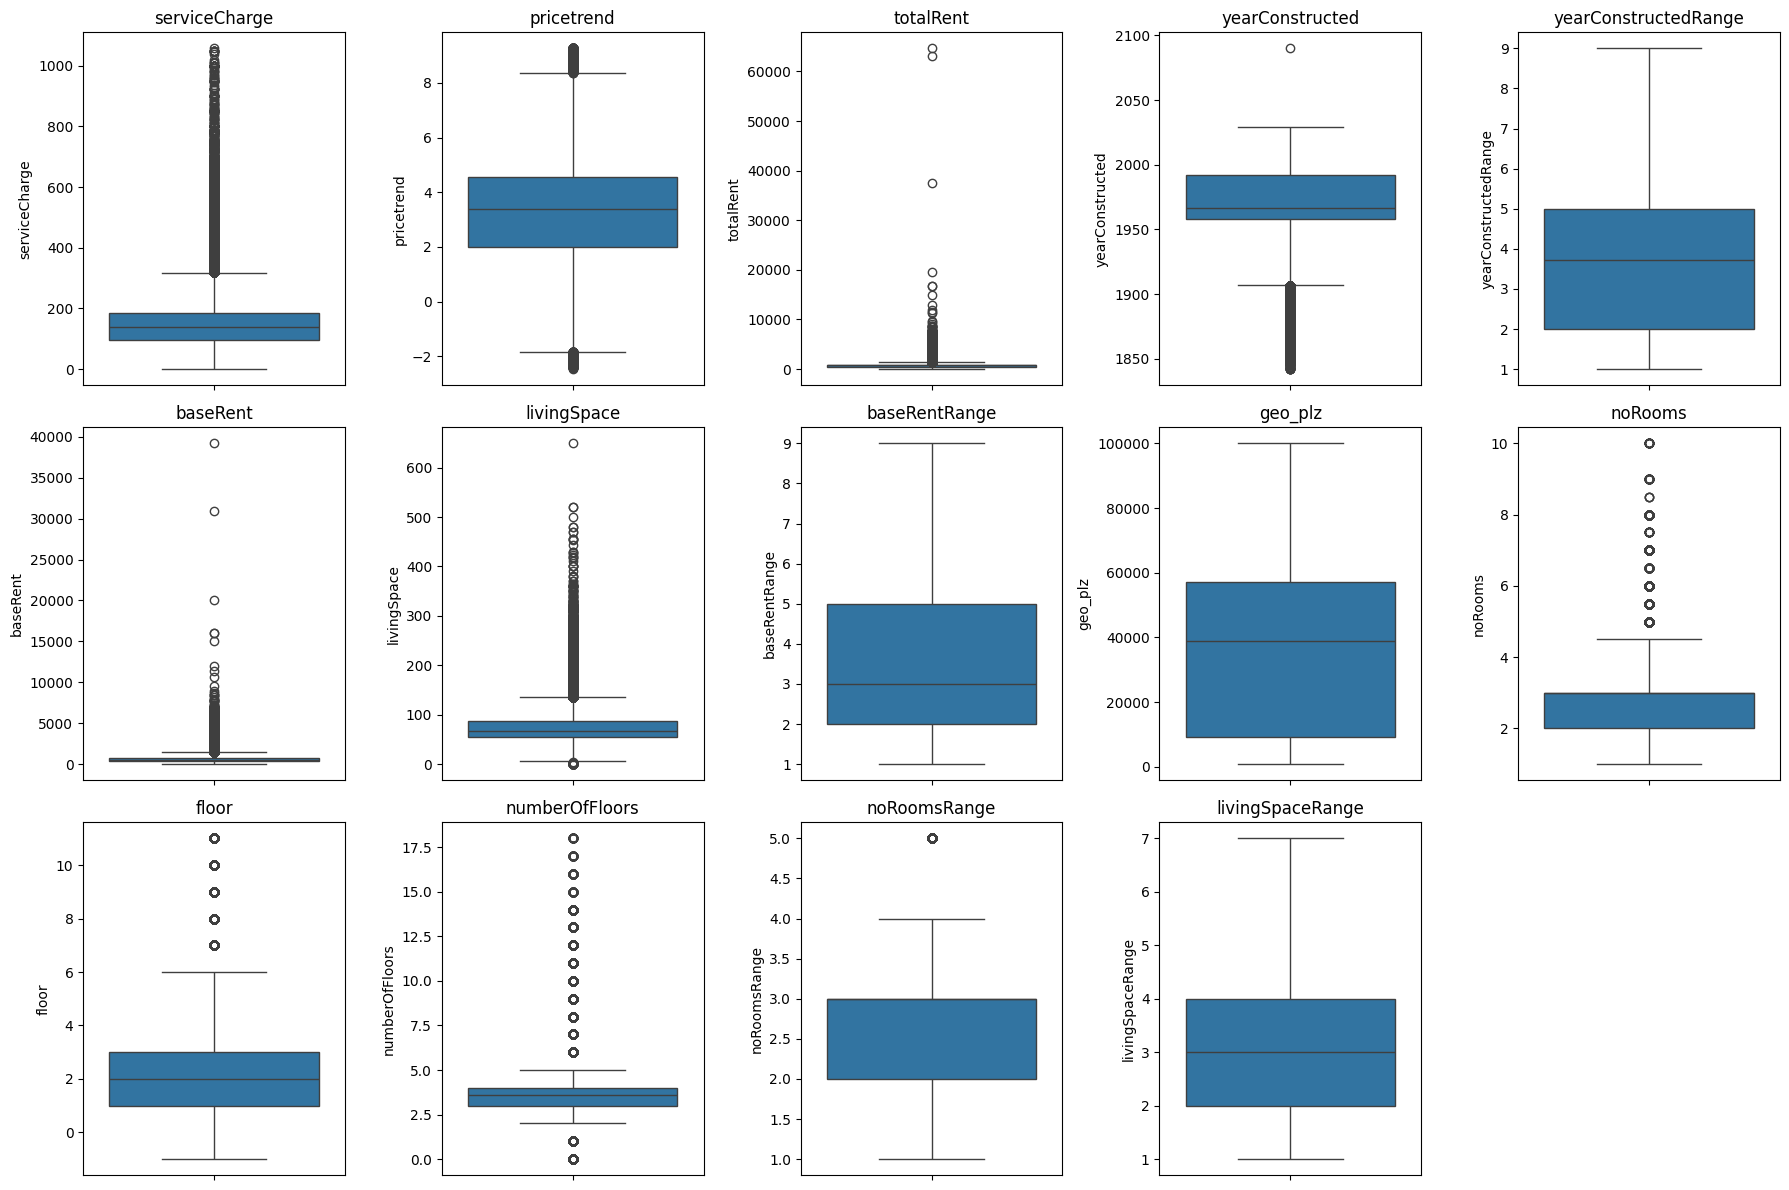

In [ ]:
# Assuming you have a DataFrame nameud 'data' with numerical columns
numerical_columns = df.select_dtypes(include='number')

plt.figure(figsize=(18, 12))

num_plots = len(numerical_columns.columns)  # Total number of plots
num_rows = (num_plots // 5) + 1  # Calculate the number of rows needed

for i, col in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, 5, i+1)  # Adjusting subplot position
    sns.boxplot(y=numerical_columns[col], showfliers=True)
    plt.title(col)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
df.isnull().sum()

regio1                  0
serviceCharge           0
newlyConst              0
balcony                 0
pricetrend              0
totalRent               0
yearConstructed         0
hasKitchen              0
yearConstructedRange    0
baseRent                0
livingSpace             0
street                  0
lift                    0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
floor                   0
numberOfFloors          0
noRoomsRange            0
livingSpaceRange        0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=df.columns[data.dtypes !='object']

#Fit on data
df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

<ipython-input-57-a7b14906840f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_vars] = scaler.fit_transform(df[num_vars])


,regio1,serviceCharge,newlyConst,balcony,pricetrend,totalRent,yearConstructed,hasKitchen,yearConstructedRange,baseRent,...,street,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,floor,numberOfFloors,noRoomsRange,livingSpaceRange
0,Nordrhein_Westfalen,0.231678,0.0,0.0,0.604433,0.012993,0.495968,0.0,0.125,0.015179,...,Sch&uuml;ruferstra&szlig;e,0.0,0.375,ground_floor,0.437910,0.333333,0.166667,0.166667,0.75,0.500000
1,Rheinland_Pfalz,0.126714,0.0,1.0,0.506394,0.013941,0.116935,0.0,0.000,0.020408,...,no_information,0.0,0.500,ground_floor,0.671807,0.222222,0.260200,0.198462,0.50,0.500000
2,Sachsen,0.241135,1.0,1.0,0.442455,0.020108,0.713710,0.0,1.000,0.024617,...,Turnerweg,1.0,0.625,apartment,0.002471,0.222222,0.333333,0.222222,0.50,0.500000
3,Sachsen,0.054988,0.0,1.0,0.341006,0.013941,0.491935,0.0,0.125,0.008750,...,Gl&uuml;ck-Auf-Stra&szlig;e,0.0,0.125,other,0.088223,0.222222,0.333333,0.198462,0.50,0.166667
4,Bremen,0.130496,0.0,1.0,0.420290,0.013967,0.435484,0.0,0.000,0.019515,...,Hermann-Henrich-Meier-Allee,0.0,0.500,apartment,0.275967,0.222222,0.166667,0.198462,0.50,0.500000


plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")
for i, col in enumerate(data_no_outliers.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=data_no_outliers[col], showfliers=True)
    plt.title(f'{col} - After Outlier Removal')
plt.tight_layout()
plt.show()

In [ ]:
'''plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')'''


ValueError: could not convert string to float: 'ground_floor'

<Figure size 3000x3000 with 0 Axes>

In [ ]:
'''correlation_values = df.corr()['baseRent'].sort_values(ascending=False)
correlation_values '''

ValueError: could not convert string to float: 'ground_floor'

In [ ]:
df=df.drop(['numberOfFloors','floor','street','regio1','noRooms','baseRentRange','lift','yearConstructed','totalRent'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264413 entries, 0 to 268849
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   serviceCharge         264413 non-null  float64
 1   newlyConst            264413 non-null  float64
 2   balcony               264413 non-null  float64
 3   pricetrend            264413 non-null  float64
 4   hasKitchen            264413 non-null  float64
 5   yearConstructedRange  264413 non-null  float64
 6   baseRent              264413 non-null  float64
 7   livingSpace           264413 non-null  float64
 8   typeOfFlat            264413 non-null  object 
 9   geo_plz               264413 non-null  float64
 10  noRoomsRange          264413 non-null  float64
 11  livingSpaceRange      264413 non-null  float64
dtypes: float64(11), object(1)
memory usage: 26.2+ MB


In [ ]:
df.isnull().sum()

serviceCharge           0
newlyConst              0
balcony                 0
pricetrend              0
hasKitchen              0
yearConstructedRange    0
baseRent                0
livingSpace             0
typeOfFlat              0
geo_plz                 0
noRoomsRange            0
livingSpaceRange        0
dtype: int64

In [ ]:

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['typeOfFlat'], dtype='object')

In [ ]:
df['typeOfFlat'].unique()


array(['ground_floor', 'apartment', 'other', 'roof_storey',
       'raised_ground_floor', 'terraced_flat', 'half_basement',
       'maisonette', 'penthouse', 'loft'], dtype=object)

In [ ]:
ordinal_mapping = {
    'ground_floor': 1,
    'raised_ground_floor': 2,
    'apartment': 3,
    'roof_storey': 4,
    'terraced_flat': 5,
    'half_basement': 6,
    'maisonette': 7,
    'penthouse': 8,
    'loft': 9,
    'other': 10  # Assign a value for 'other' if it exists
}

# Perform ordinal encoding on 'typeOfFlat' column
df['typeOfFlat'] = df['typeOfFlat'].replace(ordinal_mapping)

# Display the updated DataFrame
print(df.head())

   serviceCharge  newlyConst  balcony  pricetrend  hasKitchen  \
0       0.231678         0.0      0.0    0.604433         0.0   
1       0.126714         0.0      1.0    0.506394         0.0   
2       0.241135         1.0      1.0    0.442455         0.0   
3       0.054988         0.0      1.0    0.341006         0.0   
4       0.130496         0.0      1.0    0.420290         0.0   

   yearConstructedRange  baseRent  livingSpace  typeOfFlat   geo_plz  \
0                 0.125  0.015179     0.132512           1  0.437910   
1                 0.000  0.020408     0.137134           1  0.671807   
2                 1.000  0.024617     0.129122           3  0.002471   
3                 0.125  0.008750     0.089599          10  0.088223   
4                 0.000  0.019515     0.130924           3  0.275967   

   noRoomsRange  livingSpaceRange  
0          0.75          0.500000  
1          0.50          0.500000  
2          0.50          0.500000  
3          0.50          0.16666

In [ ]:
df['typeOfFlat'].unique()

array([ 1,  3, 10,  4,  2,  5,  6,  7,  8,  9])

In [ ]:
# Define the mapping for encoding
encoding_mapping = {True: 1, False: 0}

# Replace values in the 'lift' column using the mapping
df['hasKitchen'] = df['hasKitchen'].replace(encoding_mapping)

# Display unique values and their encoded counterparts
print("Unique values in 'hasKitchen':", df['hasKitchen'].unique())
print("Encoded values:", df['hasKitchen'].unique())

Unique values in 'hasKitchen': [0. 1.]
Encoded values: [0. 1.]


In [ ]:
# Define the mapping for encoding
encoding_mapping = {True: 1, False: 0}

# Replace values in the 'lift' column using the mapping
df['newlyConst'] = df['newlyConst'].replace(encoding_mapping)

# Display unique values and their encoded counterparts
print("Unique values in 'newlyConst':", df['newlyConst'].unique())
print("Encoded values:", df['newlyConst'].unique())

Unique values in 'newlyConst': [0. 1.]
Encoded values: [0. 1.]


In [ ]:
# Define the mapping for encoding
encoding_mapping = {True: 1, False: 0}

# Replace values in the 'lift' column using the mapping
df['balcony'] = df['balcony'].replace(encoding_mapping)

# Display unique values and their encoded counterparts
print("Unique values in 'newly_const':", df['balcony'].unique())
print("Encoded values:", df['balcony'].unique())

Unique values in 'newly_const': [0. 1.]
Encoded values: [0. 1.]


In [ ]:
df.head()

,serviceCharge,newlyConst,balcony,pricetrend,hasKitchen,yearConstructedRange,baseRent,livingSpace,typeOfFlat,geo_plz,noRoomsRange,livingSpaceRange
0,0.231678,0.0,0.0,0.604433,0.0,0.125,0.015179,0.132512,1,0.437910,0.75,0.500000
1,0.126714,0.0,1.0,0.506394,0.0,0.000,0.020408,0.137134,1,0.671807,0.50,0.500000
2,0.241135,1.0,1.0,0.442455,0.0,1.000,0.024617,0.129122,3,0.002471,0.50,0.500000
3,0.054988,0.0,1.0,0.341006,0.0,0.125,0.008750,0.089599,10,0.088223,0.50,0.166667
4,0.130496,0.0,1.0,0.420290,0.0,0.000,0.019515,0.130924,3,0.275967,0.50,0.500000


In [ ]:
df.shape

(264413, 12)

<Axes: >

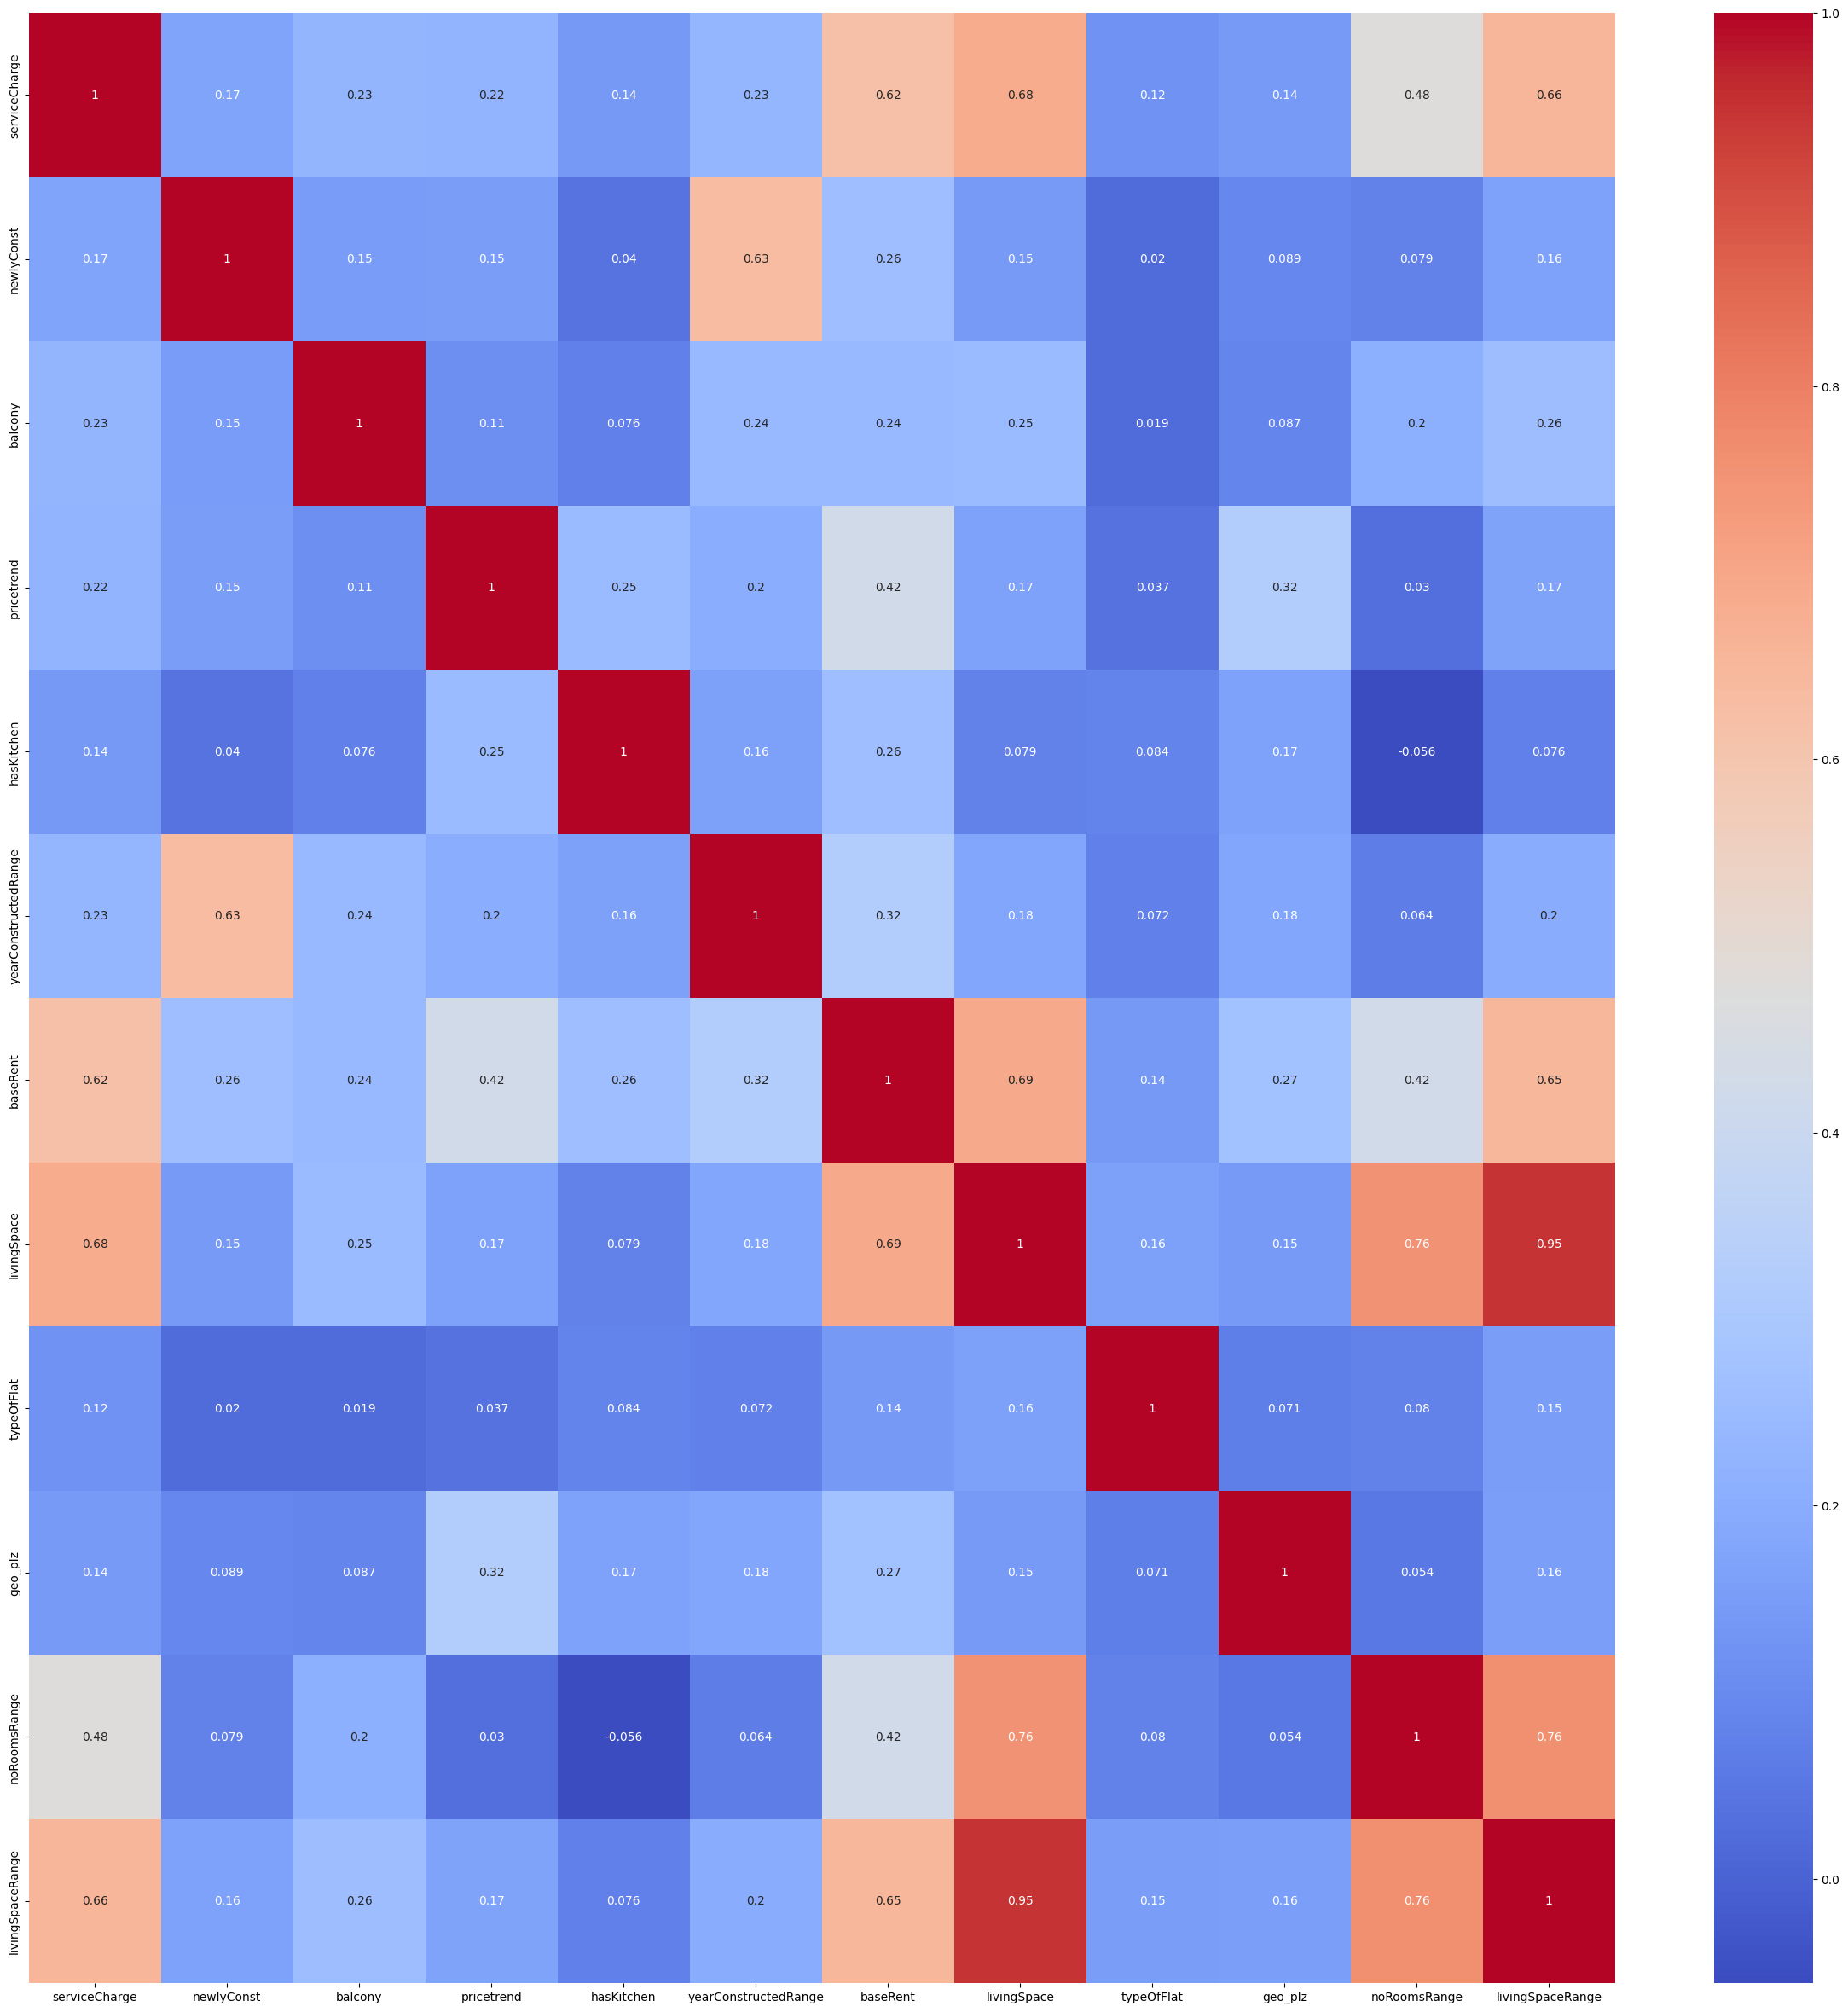

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
baseRent_corr = df.corr()['baseRent']
baseRent_corr

serviceCharge           0.618118
newlyConst              0.260956
balcony                 0.241557
pricetrend              0.423772
hasKitchen              0.260979
yearConstructedRange    0.322981
baseRent                1.000000
livingSpace             0.694135
typeOfFlat              0.139357
geo_plz                 0.273961
noRoomsRange            0.424050
livingSpaceRange        0.649492
Name: baseRent, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

X = df.drop('baseRent', axis=1)
y = df['baseRent']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root mean square Error: {rmse}')



 R-squared: 0.6811202148110396
Mean Squared Error: 4.816744342839954e-05
Mean Absolute Error: 0.004234975498204564
Root mean square Error: 0.00694027689853939


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Assuming 'X' contains your feature matrix and 'y' contains your target variable

# Define the models
models = {
    "Linear Regression (MinMaxScaler)": make_pipeline(MinMaxScaler(), LinearRegression()),
    "Linear Regression (StandardScaler)": make_pipeline(StandardScaler(), LinearRegression()),
    "Linear Regression (RobustScaler)": make_pipeline(RobustScaler(), LinearRegression())
}

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"{name}: Mean MSE: {-scores.mean()}, Std MSE: {scores.std()}")

# Choose the model with the lowest mean MSE

Linear Regression (MinMaxScaler): Mean MSE: 5.7118221738301065e-05, Std MSE: 1.3934292696005946e-05
Linear Regression (StandardScaler): Mean MSE: 5.711822173830107e-05, Std MSE: 1.393429269600594e-05
Linear Regression (RobustScaler): Mean MSE: 5.7118221738301065e-05, Std MSE: 1.3934292696005942e-05


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # Alpha is the regularization strength
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root mean square Error: {rmse}')

 R-squared: 0.6811202148110396
Mean Squared Error: 4.816744342839954e-05
Mean Absolute Error: 0.004234975498204564
Root mean square Error: 0.00694027689853939


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


poly = PolynomialFeatures(degree=2)  # You can experiment with different degrees
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Initialize and train the Ridge Regression model (with regularization)
ridge_model = Ridge(alpha=0.1)  # You can experiment with different alpha values
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = ridge_model.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print(f'Mean Absolute Error: {mae}')
print(f'Root mean square Error: {rmse}')

Mean Squared Error (MSE): 3.870687729664618e-05
R-squared (R2) Score: 0.7437513839397039
Mean Absolute Error: 0.0036282896569612166
Root mean square Error: 0.0062214851359338776


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regression
# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_regressor.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)


print("Random Forest Regression Metrics:")
print("Mean Absolute Error:", rf_mae)
print("Mean Squared Error:", rf_mse)
print("Root Mean Squared Error:", rf_rmse)
print("R-squared:", rf_r2)


Random Forest Regression Metrics:
Mean Absolute Error: 0.002458303015133629
Mean Squared Error: 2.153373840017136e-05
Root Mean Squared Error: 0.004640445926866443
R-squared: 0.857441595679265


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regression
# Initialize the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt_regressor.predict(X_test)

# Evaluate the model
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_predictions)

print("Decision Tree Regression Metrics:")
print("Mean Absolute Error:", dt_mae)
print("Mean Squared Error:", dt_mse)
print("Root Mean Squared Error:", dt_rmse)
print("R-squared:", dt_r2)


Decision Tree Regression Metrics:
Mean Absolute Error: 0.0033966831519625083
Mean Squared Error: 4.223813869833597e-05
Root Mean Squared Error: 0.0064990875281331585
R-squared: 0.720373604322009
